In [1]:
import scanpy as sc

In [2]:
data_file = './outs/adata/harmony.h5ad'
save_file = './outs/adata/annotated_lvl1.h5ad'

In [3]:
# load data
adata = sc.read_h5ad(data_file)
adata

AnnData object with n_obs × n_vars = 128637 × 32982
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'sample'
    var: 'ens_id', 'symbol', 'mt', 'n_cells', 'n_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'log1p', 'pca'
    obsm: 'X_pca', 'X_pca_harmony'
    varm: 'PCs'
    layers: 'counts'

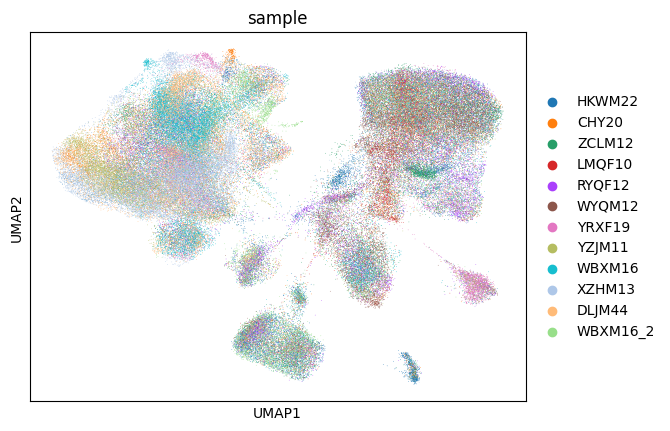

In [4]:
# run umap, view batch correction
sc.pp.neighbors(adata, use_rep='X_pca_harmony')
sc.tl.umap(adata)
sc.pl.umap(adata, color='sample')

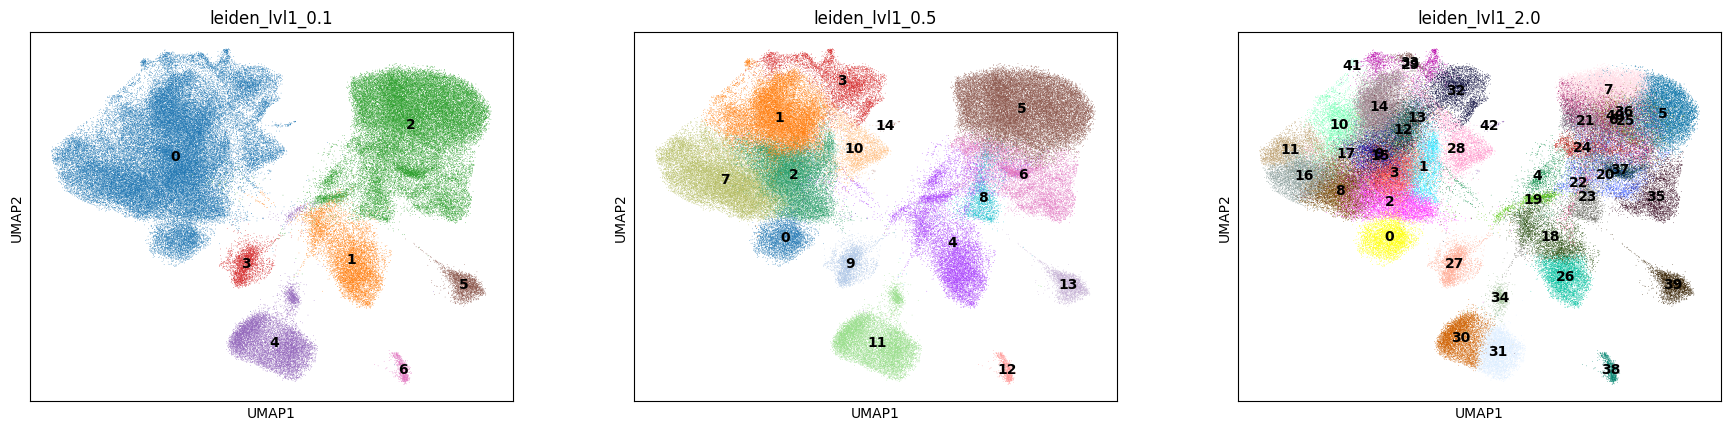

In [5]:
# run leiden clustering
for res in [0.1, 0.5, 2.0]:
    sc.tl.leiden(adata, key_added='leiden_lvl1_%s' % res, resolution=res, flavor='igraph')
sc.pl.umap(adata, color=['leiden_lvl1_0.1', 'leiden_lvl1_0.5', 'leiden_lvl1_2.0'], legend_loc='on data')

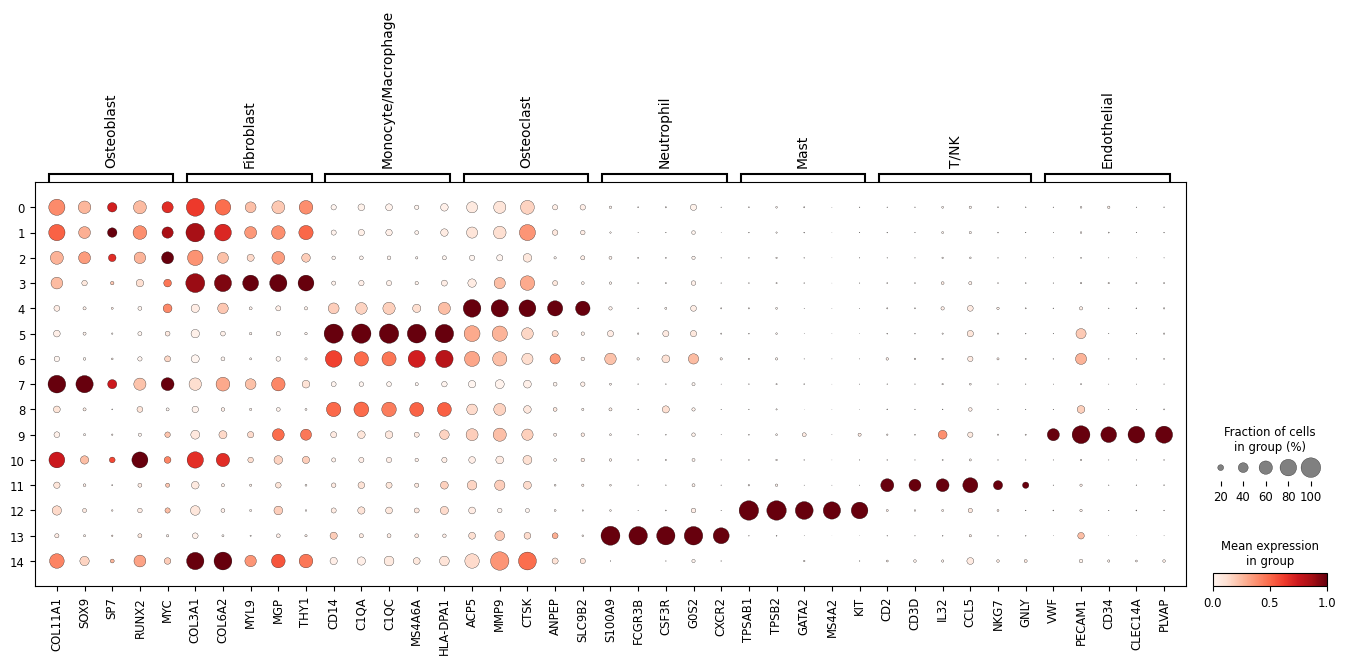

In [6]:
marker_genes = {
    'Osteoblast': ['COL11A1', 'SOX9', 'SP7', 'RUNX2', 'MYC'],
    'Fibroblast': ['COL3A1', 'COL6A2', 'MYL9', 'MGP', 'THY1'],
    'Monocyte/Macrophage': ['CD14', 'C1QA', 'C1QC', 'MS4A6A', 'HLA-DPA1'],
    'Osteoclast': ['ACP5', 'MMP9', 'CTSK', 'ANPEP', 'SLC9B2'],
    'Neutrophil': ['S100A9', 'FCGR3B', 'CSF3R', 'G0S2', 'CXCR2'],
    'Mast': ['TPSAB1', 'TPSB2', 'GATA2', 'MS4A2', 'KIT'],
    'T/NK': ['CD2', 'CD3D', 'IL32', 'CCL5', 'NKG7', 'GNLY'],
    'Endothelial': ['VWF', 'PECAM1', 'CD34', 'CLEC14A', 'PLVAP'],
}
sc.pl.dotplot(adata, marker_genes, groupby='leiden_lvl1_0.5', standard_scale='var')

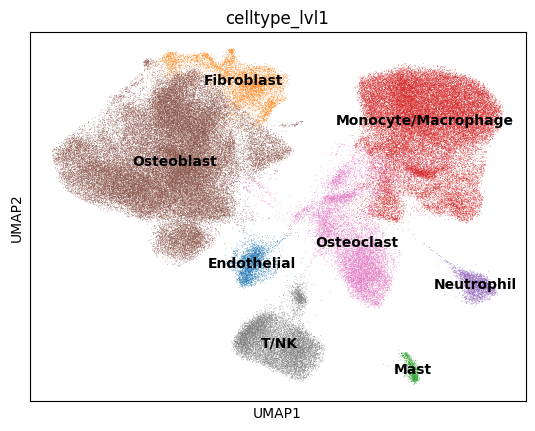

In [7]:
adata.obs['celltype_lvl1'] = adata.obs['leiden_lvl1_0.5'].map(
    {
        '0': 'Osteoblast',
        '1': 'Osteoblast',
        '2': 'Osteoblast',
        '3': 'Fibroblast',
        '4': 'Osteoclast',
        '5': 'Monocyte/Macrophage',
        '6': 'Monocyte/Macrophage',
        '7': 'Osteoblast',
        '8': 'Monocyte/Macrophage',
        '9': 'Endothelial',
        '10': 'Osteoblast',
        '11': 'T/NK',
        '12': 'Mast',
        '13': 'Neutrophil',
        '14': 'Osteoblast',
    }
)
sc.pl.umap(adata, color=['celltype_lvl1'], legend_loc='on data')

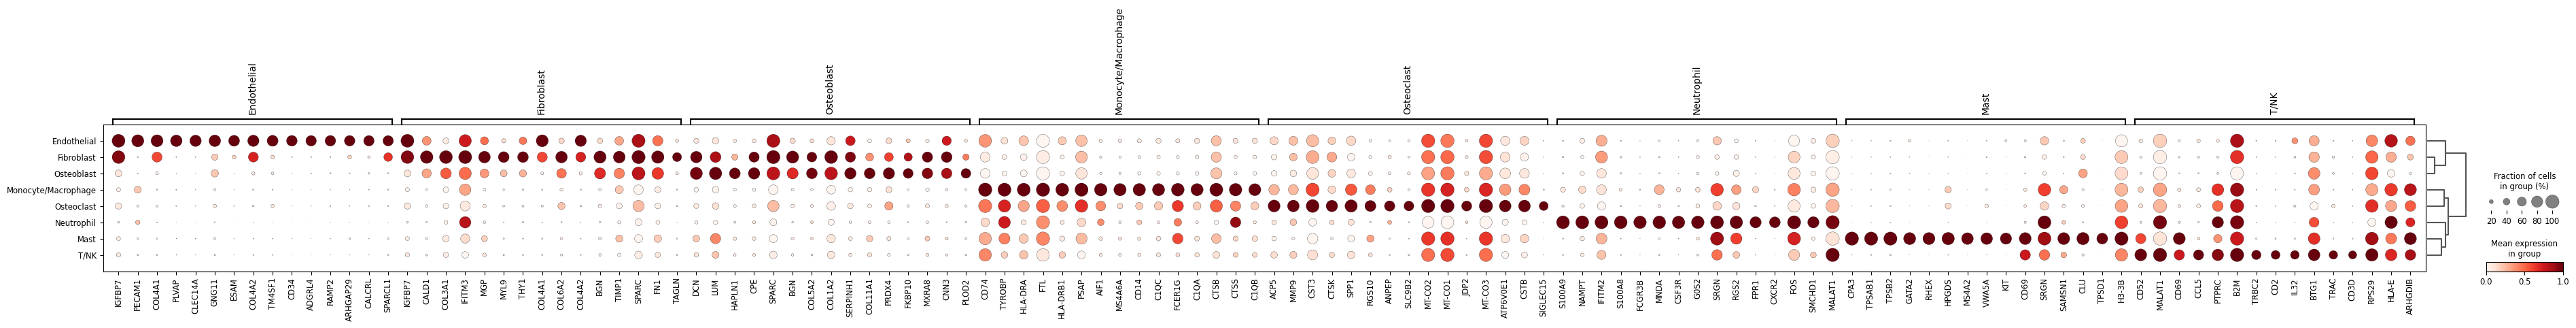

In [8]:
# DEG
sc.tl.rank_genes_groups(adata, groupby='celltype_lvl1', method='wilcoxon')
sc.pl.rank_genes_groups_dotplot(adata, groupby='celltype_lvl1', standard_scale='var', n_genes=15)

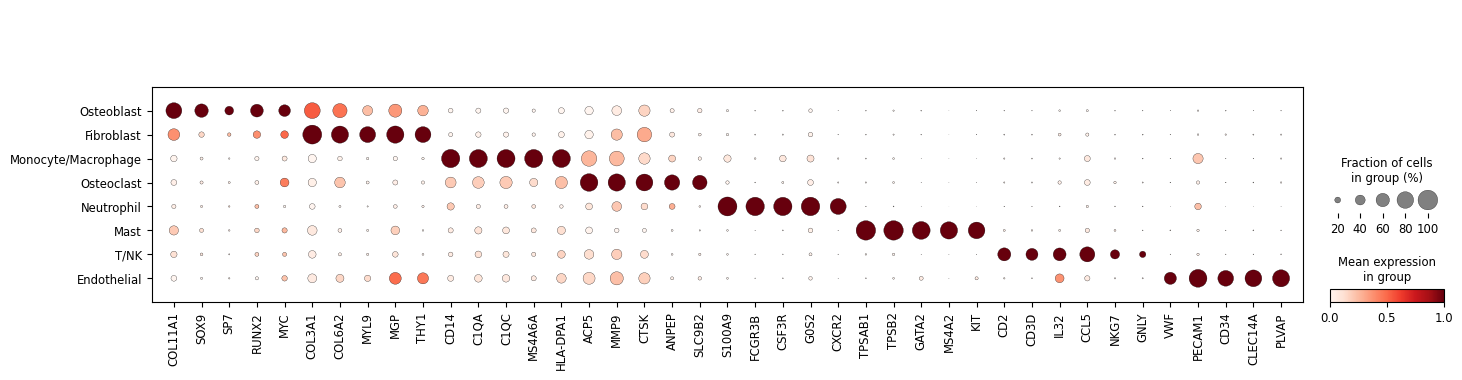

In [9]:
marker_genes = {
    'Osteoblast': ['COL11A1', 'SOX9', 'SP7', 'RUNX2', 'MYC'],
    'Fibroblast': ['COL3A1', 'COL6A2', 'MYL9', 'MGP', 'THY1'],
    'Monocyte/Macrophage': ['CD14', 'C1QA', 'C1QC', 'MS4A6A', 'HLA-DPA1'],
    'Osteoclast': ['ACP5', 'MMP9', 'CTSK', 'ANPEP', 'SLC9B2'],
    'Neutrophil': ['S100A9', 'FCGR3B', 'CSF3R', 'G0S2', 'CXCR2'],
    'Mast': ['TPSAB1', 'TPSB2', 'GATA2', 'MS4A2', 'KIT'],
    'T/NK': ['CD2', 'CD3D', 'IL32', 'CCL5', 'NKG7', 'GNLY'],
    'Endothelial': ['VWF', 'PECAM1', 'CD34', 'CLEC14A', 'PLVAP'],
}
lvl1 = ['Osteoblast', 'Fibroblast', 'Monocyte/Macrophage', 'Osteoclast', 'Neutrophil', 'Mast', 'T/NK', 'Endothelial']
sc.pl.dotplot(adata, [val for value in marker_genes.values() for val in value], groupby='celltype_lvl1', categories_order=lvl1, standard_scale='var')

In [10]:
# save
adata.write_h5ad(save_file)